### Analyse et Transformation des Données
Ce notebook montre comment analyser et transformer un jeu de données avec `pandas`.
Chaque étape est expliquée avec des commentaires clairs.

### Let's start by importing the libraries that will help us throughout the project, adjusting them as we go along.

In [2]:
# Importer pandas
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn

### We have 2 files that we need to concatenate after formatting and with the right naming so that these 2 files can be uniform.

In [3]:
# Load data file
data1 = pd.read_csv('Trips_ROP_transformed_2021_Q1.csv')
data2 = pd.read_csv('Trips_ROP_transformed_2020_Q4.csv')
data2.rename(columns={
    'Bucketdate': 'Bucket',
    'EndName': 'EndName',
    'Wochentag': 'Wochentag(d)',
    'Tageszeit': 'Tageszeit(h)',
    'Schulferien': 'Schulferien',
    'Distanz': 'Distanz',
    'Count(Zaehler)': 'Count'
}, inplace=True)
data = pd.concat([data1, data2], ignore_index=True)

In [4]:
# we display the first 5 lines of dataset 2 to see if the collone names are indeed ok 
data2.head(10)

,Bucket,StartName,EndName,Wochentag(d),Tageszeit(h),Schulferien,Distanz,Count
0,2020-12,Turda(80982 - 03241013050002),Turda(80982 - 03241013050006),Fr,22,Keine Ferien,1,5
1,2020-12,Turda(80982 - 03241013070001),Hunedoara(71171 - 03254026000004),Sa,15,Keine Ferien,4,10
2,2020-12,Turda(80982 - 03241013070001),Turda(80982 - 03241013030001),Fr,6,Keine Ferien,8,15
3,2020-12,Bran(91157 - 03254028004001),Turda(80982 - 03241013070001),Di,14,Keine Ferien,9,10
4,2020-12,Hunedoara(71171 - 03254026000004),Hunedoara(71171 - 03254026000008),Di,6,Keine Ferien,3,10
5,2020-12,Turda(80982 - 03241013050002),Hunedoara(71171 - 03254026000004),Fr,14,Keine Ferien,9,10
6,2020-12,Turda(80982 - 03241013050006),Turda(80982 - 03241013050009),Do,13,Ferien,0,15
7,2020-12,Bran(91157 - 03254028001012),Bran(91157 - 03254028001013),So/Fe,18,Ferien,0,25
8,2020-12,Turda(80982 - 03241013080001),Turda(80982 - 03241013050002),Di,6,Keine Ferien,4,5
9,2020-12,Hunedoara(71171 - 03254026000008),Turda(80982 - 03241013070001),Sa,10,Keine Ferien,5,10


In [5]:
# Preview data to understand structure
data1.head()

,Bucket,StartName,EndName,Wochentag(d),Tageszeit(h),Schulferien,Distanz,Count
0,2021-03,Hunedoara(71171 - 03254026000002),Hunedoara(71171 - 03254026000007),Di,7,Keine Ferien,3,15
1,2021-03,Turda(80982 - 03241013050002),Turda(80982 - 03241013050008),Mi,17,Keine Ferien,0,10
2,2021-03,Turda(80982 - 03241013050007),Turda(80982 - 03241013030001),Sa,11,Keine Ferien,3,10
3,2021-03,Bran(91157 - 03254028001012),Bran(91157 - 03254028001004),Fr,13,Keine Ferien,0,15
4,2021-03,Bran(91157 - 03254028001003),Turda(80982 - 03241013070001),Fr,18,Keine Ferien,7,10


In [6]:
#display data 
data

,Bucket,StartName,EndName,Wochentag(d),Tageszeit(h),Schulferien,Distanz,Count
0,2021-03,Hunedoara(71171 - 03254026000002),Hunedoara(71171 - 03254026000007),Di,7,Keine Ferien,3,15
1,2021-03,Turda(80982 - 03241013050002),Turda(80982 - 03241013050008),Mi,17,Keine Ferien,0,10
2,2021-03,Turda(80982 - 03241013050007),Turda(80982 - 03241013030001),Sa,11,Keine Ferien,3,10
3,2021-03,Bran(91157 - 03254028001012),Bran(91157 - 03254028001004),Fr,13,Keine Ferien,0,15
4,2021-03,Bran(91157 - 03254028001003),Turda(80982 - 03241013070001),Fr,18,Keine Ferien,7,10
...,...,...,...,...,...,...,...,...
277022,2020-10,Bran(91157 - 03254028001012),Bran(91157 - 03254028001003),Mo,9,Ferien,0,15
277023,2020-10,Bran(91157 - 03254028001013),Turda(80982 - 03241013070001),Di,18,Keine Ferien,7,15
277024,2020-10,Bran(91157 - 03254028001013),Bran(91157 - 03254028003001),Di,9,Keine Ferien,2,10
277025,2020-10,Hunedoara(71171 - 03254026000014),Hunedoara(71171 - 03254026000003),Mo,18,Keine Ferien,5,5


## 1.1 Categorization of attributes


# If the header is read correctly, now classify the attributes into the following categories:

# **Nominal Attributes**

# StartName
# EndName
# Schulferien


# **Ordinal Attributes**
# Wochentag(d)

# **Metric continuous Attributes**

# **Metric discrete Attributes**
# Tageszeit(h)
# Distanz
# Count
# Bucket (potentiellement)

In [7]:
# Here we display the different values of the dispersion parameters on the numerical columns.
data.describe()

,Tageszeit(h),Distanz,Count
count,277027.000000,277027.000000,277027.000000
mean,13.083367,2.507579,13.711064
std,4.038406,8.966342,56.449062
min,0.000000,0.000000,5.000000
25%,10.000000,1.000000,10.000000
50%,13.000000,2.000000,10.000000
75%,16.000000,4.000000,15.000000
max,23.000000,3000.000000,25000.000000


In [8]:
#Essential key figures plus suitable selection 
metricAttributes = ['Tageszeit(h)','Distanz','Count']
param_stat = data[metricAttributes].agg([ 'median', 'kurt','var','skew'])

param_stat

,Tageszeit(h),Distanz,Count
median,13.000000,2.000000,10.000000
kurt,-0.545168,91831.602688,145858.186619
var,16.308721,80.395287,3186.496609
skew,-0.095427,284.665298,355.541939


### for Tageszeit
The distribution of hours is almost uniform, with a slight concentration around midday (mean and median close to 1 pm).

### for Distanz
The majority of distances are small (≤ 4), but there are exceptionally high distances (outliers) that strongly influence the mean and metrics such as skewness.

### for count
Most values are close to 10 (median and quartiles). However, extremely high values (e.g. 25,000) distort the mean and considerably increase dispersion.

**Create a histogram for the "Tageszeit(h)" . Here you should also insert Q1, median and Q3. since this column makes ‘small steps’ in the numbers, it is advisable to adjust the x-ticks. a tip: the bins then result from the maximum value of the histogram divided by the number of ticks for a nice histogram.**

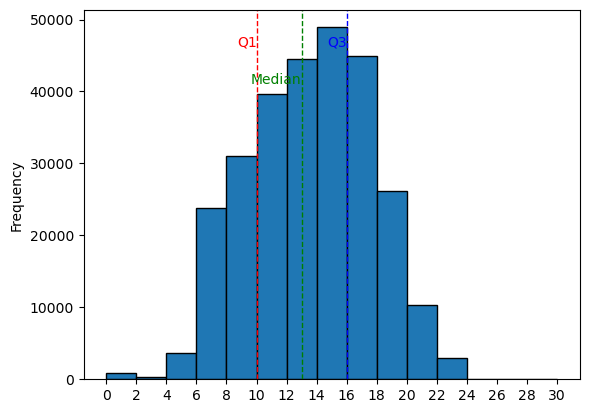

In [9]:
ax = data["Tageszeit(h)"].plot.hist(edgecolor='black', bins=15, range=(0,30))
# Set the X-axis ticks in steps of 2
ax.set_xticks(np.arange(0, 31, 2))

# calculation of the quantiles
q1 = data["Tageszeit(h)"].quantile(0.25)
median = data["Tageszeit(h)"].median()
q3 = data["Tageszeit(h)"].quantile(0.75)

# Inserting the lines for Q1, median and Q3
plt.axvline(q1, color='red', linestyle='dashed', linewidth=1)
plt.axvline(median, color='green', linestyle='dashed', linewidth=1)
plt.axvline(q3, color='blue', linestyle='dashed', linewidth=1)

# Labelling of the lines
plt.text(q1, plt.ylim()[1]*0.9, 'Q1', color='red', ha='right')
plt.text(median, plt.ylim()[1]*0.8, 'Median', color='green', ha='right')    # the *0.8 sets "median" a bit more low
plt.text(q3, plt.ylim()[1]*0.9, 'Q3', color='blue', ha='right')

plt.show()

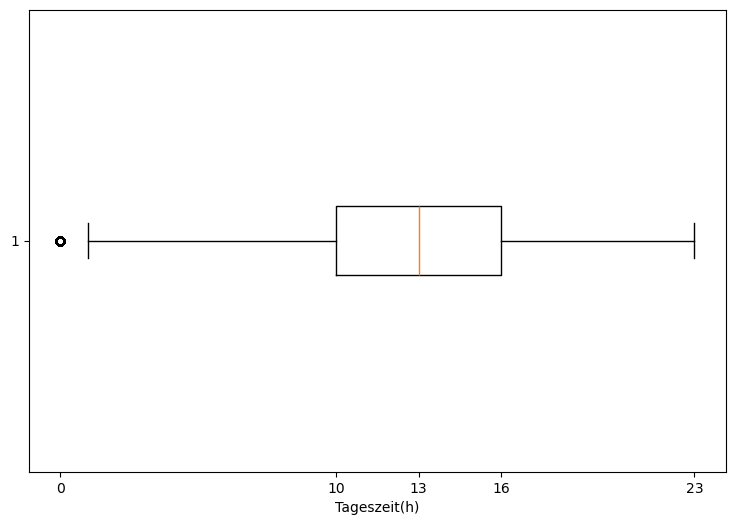

In [10]:
vel_arr = data['Tageszeit(h)']
fig = plt.figure(1, figsize = (9, 6))
ax = fig.add_subplot()

ax.boxplot(vel_arr, vert = False)
ax.set_xlabel('Tageszeit(h)')

quantiles = np.quantile(vel_arr, np.array([0.00, 0.25, 0.50, 0.75, 1.00]))

ax.set_xticks(quantiles)
plt.show()

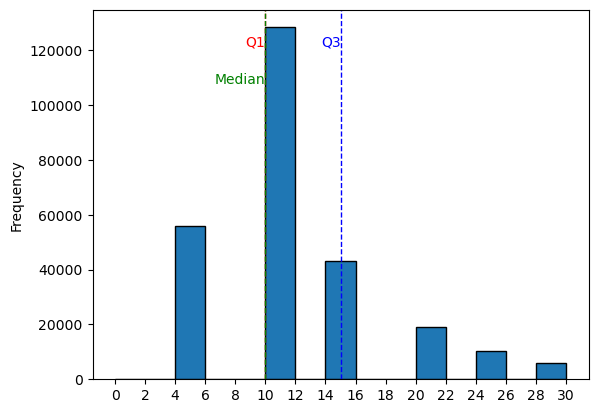

In [11]:
# Same for Count
ax = data["Count"].plot.hist(edgecolor='black', bins=15, range=(0,30))
# Set the X-axis ticks in steps of 2
ax.set_xticks(np.arange(0, 31, 2))

# calculation of the quantiles
q1 = data["Count"].quantile(0.25)
median = data["Count"].median()
q3 = data["Count"].quantile(0.75)

# Inserting the lines for Q1, median and Q3
plt.axvline(q1, color='red', linestyle='dashed', linewidth=1)
plt.axvline(median, color='green', linestyle='dashed', linewidth=1)
plt.axvline(q3, color='blue', linestyle='dashed', linewidth=1)

# Labelling of the lines
plt.text(q1, plt.ylim()[1]*0.9, 'Q1', color='red', ha='right')
plt.text(median, plt.ylim()[1]*0.8, 'Median', color='green', ha='right')    # the *0.8 sets "median" a bit more low
plt.text(q3, plt.ylim()[1]*0.9, 'Q3', color='blue', ha='right')

plt.show()

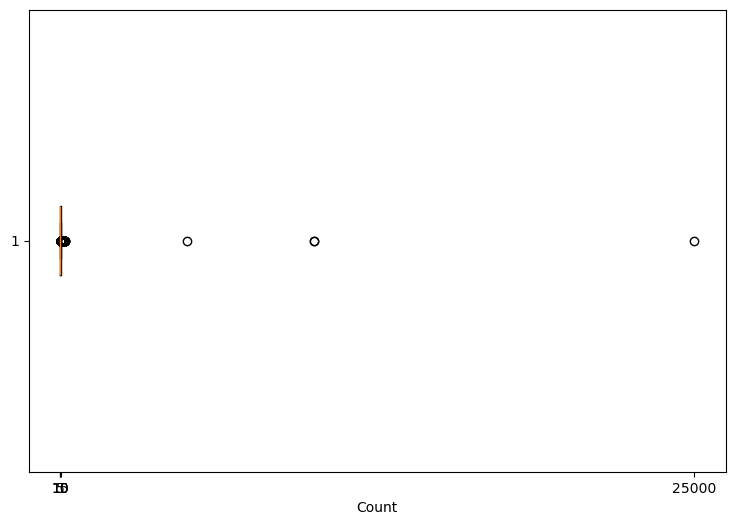

In [12]:
vel_arr = data['Count']
fig = plt.figure(1, figsize = (9, 6))
ax = fig.add_subplot()

ax.boxplot(vel_arr, vert = False)
ax.set_xlabel('Count')

quantiles = np.quantile(vel_arr, np.array([0.00, 0.25, 0.50, 0.75, 1.00]))

ax.set_xticks(quantiles)
plt.show()

As we can see from the histogram table and the following boxplot, the count data are often outliers, whereas the hours data are uniform.

### Let's take a look at the correlation between the different collones. 

In [13]:
# we calculate the linear correlation coefficients between the attributes 
# to see if there is depenndence of evolution between the different attributes.

dfCorr = data.corr(numeric_only= True)
dfCorr

,Tageszeit(h),Distanz,Count
Tageszeit(h),1.000000,-0.011344,0.001909
Distanz,-0.011344,1.000000,-0.009780
Count,0.001909,-0.009780,1.000000


The correlation coefficients between all pairs of variables are close to 0, meaning that there is no strong linear relationship between them. This does not mean that there is no relationship between them, but that : The relationships could be non-linear.

<Axes: >

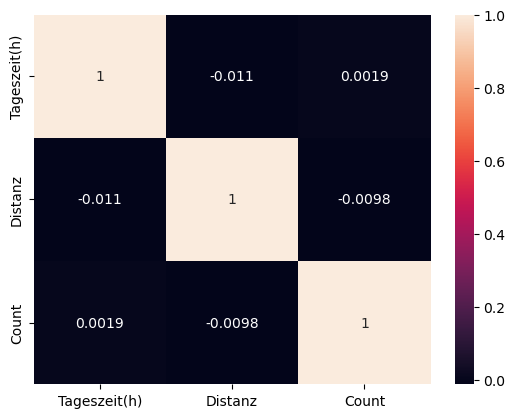

In [14]:
#Let's make a heat map of a correlation matrix to better see the correlations. 
#The data parameter must be given to the correlation table.

sn.heatmap(data = dfCorr, annot = True)

<Axes: xlabel='Tageszeit(h)', ylabel='Count'>

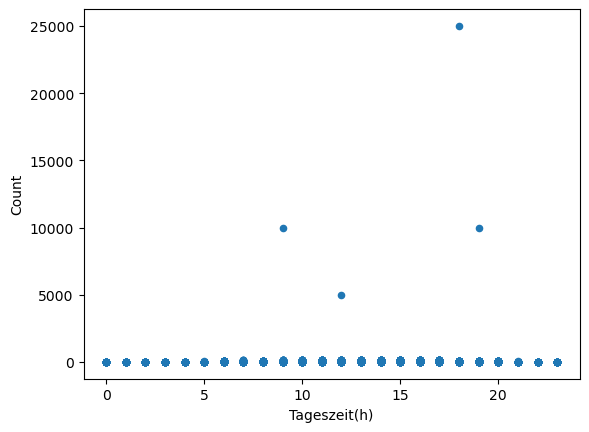

In [15]:
#Draw scatter plots between pairs of variables to visually check for non-linear relationships 
data.plot.scatter(x='Tageszeit(h)',y='Count')

In [16]:
# We conclude that there is an evolutionary relationship between the Tageszeit(h) and the counter.

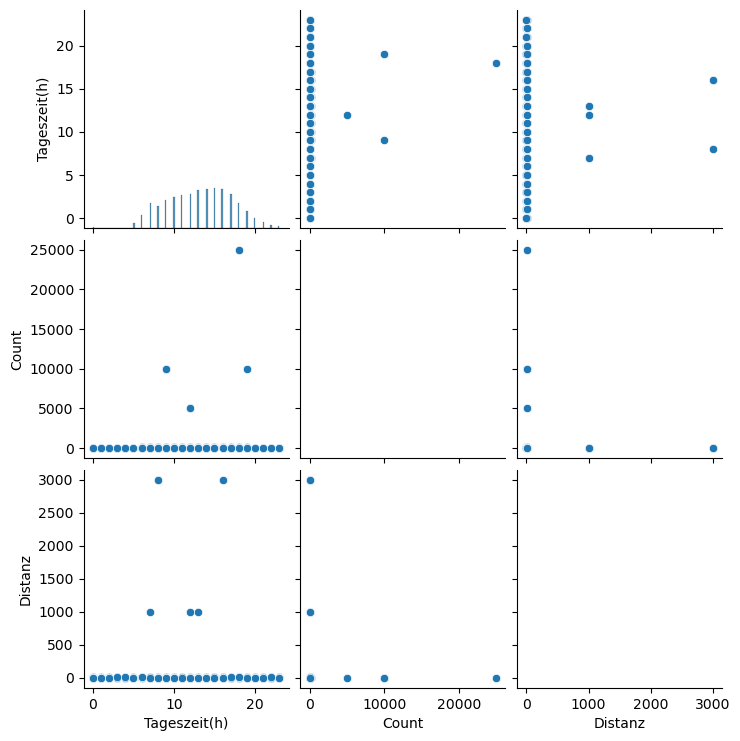

In [17]:
sn.pairplot(data = data[["Tageszeit(h)", "Count", "Distanz"]])

Resume:

The aim of this exercise was to prepare and transform a dataset in such a way as to make it ready for in-depth analysis. Here's why this exercise is important:
Understanding the data: The initial overview of the data provides a better understanding of its structure, nature and the types of values present, which is crucial in guiding future analysis.